# **PETLOVE DATA CHALLANGE**

#### Módulos Utilizados

In [2]:
# gerais
import pandas as pd
import numpy as np

# pre-processamento
from collections import Counter
from datetime import datetime
from datetime import date

# visualização
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/petlove/vagas/master/data/bi-analysis/data-test-analytics.csv")

In [4]:
#display(dataset.head(3))

## Análise Exploratória

####  Divisão do Dataset em Assinaturas Canceladas e Não Canceladas
---

In [5]:
df_canceled_subscriptions = dataset.dropna(subset=['deleted_at'])

In [6]:
# Máscara para o filtro de assinaturas não canceladas
mask = pd.isnull(dataset['deleted_at'])
df_active_subscriptions = dataset[mask]

####  Assinaturas por Estado
---

In [7]:
# Observado os valores únicos das colunas state e status
df_subscriptions_and_states = dataset[["state","status"]]
print(df_subscriptions_and_states['status'].unique())
print(df_subscriptions_and_states['state'].unique())

['active' 'paused' 'canceled']
['AM' 'RR' 'PE' 'RJ' 'MT' 'SC' 'PR' 'PB' 'AP' 'SP' 'MG' 'MA' 'AL' 'PI'
 'RO' 'AC' 'CE' 'RN' 'MS' 'PA' 'ES' 'SE' 'RS' 'DF' 'BA' 'GO' 'TO']


Text(0, 0.5, 'Amount')

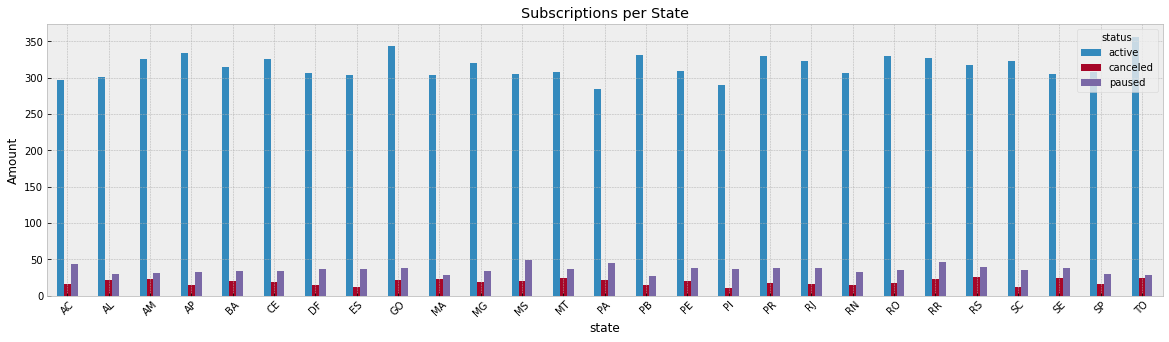

In [8]:
# Agrupando unidades únicas state-status e contando suas linhas
df_subscriptions_per_state = df_subscriptions_and_states.groupby(["state","status"]).size().unstack(1)
# Criação do Gráfico
ax_subs_per_state = df_subscriptions_per_state.plot(kind='bar',figsize=(20,5), rot=45, title="Subscriptions per State")
ax_subs_per_state.set_ylabel("Amount")

In [9]:
# Salvando a figura localmente
plt.savefig('Subscriptions per State.png', format='png')
plt.close()

####  Intervalo de Tempo antes de uma Assinatura ser Cancelada
---

In [10]:
# Obtendo a diferença, em dias, do tempo entre a criação e o cancelamento da assinatura
df_lifetime_subscription_date = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) - pd.to_datetime(df_canceled_subscriptions["created_at"])
df_lifetime_subscription_days = df_lifetime_subscription_date.astype('timedelta64[D]').astype(int)

In [11]:
# Criação dos valores do histogram, contagem e coordenadas dos grupos, para a plotagem
count, division = np.histogram(df_lifetime_subscription_days, bins=25)

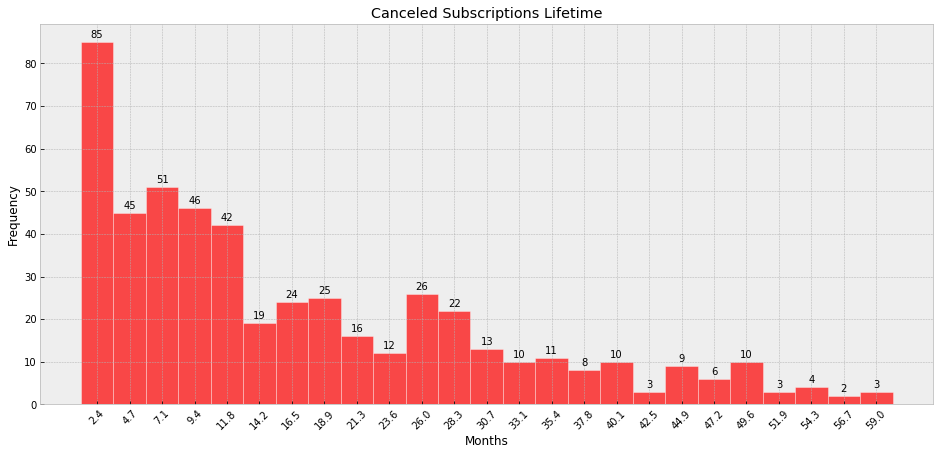

In [12]:
# Plotagem
ax_lifetime = df_lifetime_subscription_days.plot.hist(bins=division,figsize=(16,7),rot=45, title="Canceled Subscriptions Lifetime",edgecolor='w',color="red",alpha=0.7)
ax_lifetime.set_xlabel("Months")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.1f}".format(value/30) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

In [13]:
# Salvando a figura localmente
plt.savefig('Canceled Subscriptions Lifetime.png', format='png')
plt.close()

####  Intervalo de Tempo desde a Última Compra das Assinaturas Canceladas
---

In [14]:
# Obtendo a diferença, em dias, entre a última compra e o cancelamento da assinatura
df_lifetime_last_order_canceled = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) - pd.to_datetime(df_canceled_subscriptions["last_date_purchase"])
df_lifetime_last_order_canceled = df_lifetime_last_order_canceled.astype('timedelta64[D]').astype(int)

In [15]:
# Criação dos valores do histogram, contagem e coordenadas dos grupos, para a plotagem
count, division = np.histogram(df_lifetime_last_order_canceled, bins=25)

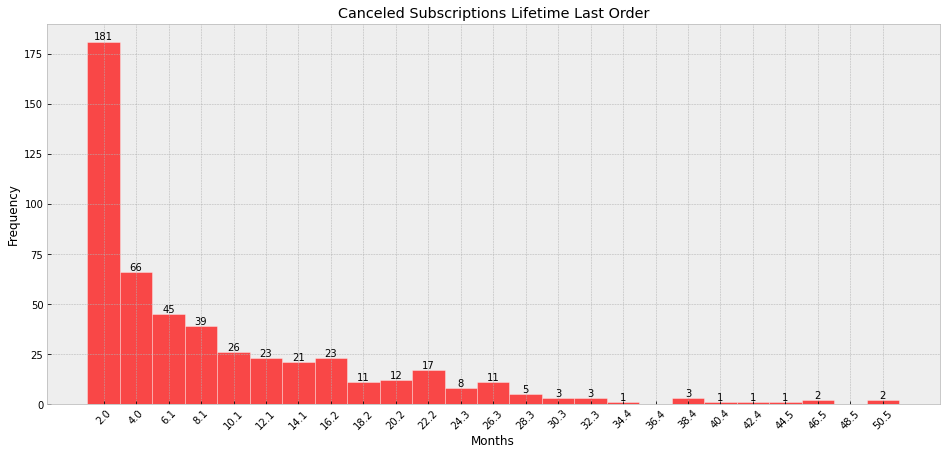

In [16]:
# Criação do Gráfico
ax_lifetime_last_order = df_lifetime_last_order_canceled.plot.hist(bins=division,figsize=(16,7),rot=45, title="Canceled Subscriptions Lifetime Last Order",color="red",edgecolor='w',alpha=0.7)
ax_lifetime_last_order.set_xlabel("Months")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.1f}".format(value/30) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')


In [17]:
# Salvando a figura localmente
plt.savefig('Canceled Subscriptions Lifetime Last Order.png', format='png')
plt.close()

####  Intervalo de Tempo desde a Última Compra das Assinaturas Ativas
---

In [18]:
#display(df_active_subscriptions.head(3))

In [19]:
# Obtendo a diferença, em dias, entre a última compra e o dia de hoje
df_lifetime_last_order_actives = pd.to_datetime(date.today()) - pd.to_datetime(df_active_subscriptions["last_date_purchase"])
df_lifetime_last_order_actives = df_lifetime_last_order_actives.astype('timedelta64[D]').astype(int)

In [20]:
# Criação dos valores do histogram, contagem e coordenadas dos grupos, para a plotagem
count, division = np.histogram(df_lifetime_last_order_actives, bins=20)

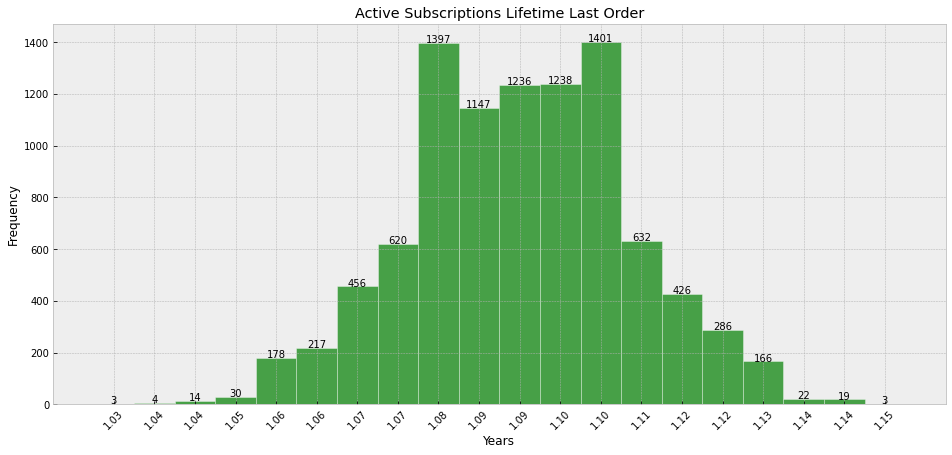

In [21]:
# Criação do Gráfico
ax_lifetime_last_order = df_lifetime_last_order_actives.plot.hist(bins=division,
                                                                  figsize=(16,7),
                                                                  rot=45,
                                                                  title="Active Subscriptions Lifetime Last Order",
                                                                  color="green",
                                                                  edgecolor='w',
                                                                  alpha=0.7)
ax_lifetime_last_order.set_xlabel("Years")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value/365) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

In [22]:
# Salvando a figura localmente
plt.savefig('Active Subscriptions Lifetime Last Order.png', format='png')
plt.close()

####  Frequência da Média de Gasto das Assinaturas
---




In [23]:
# Criação dos valores do histogram, contagem e coordenadas dos grupos, para a plotagem
count_active, division_active = np.histogram(df_active_subscriptions["average_ticket"], bins=20)
count_canceled, _ = np.histogram(df_canceled_subscriptions["average_ticket"], bins=division_active)

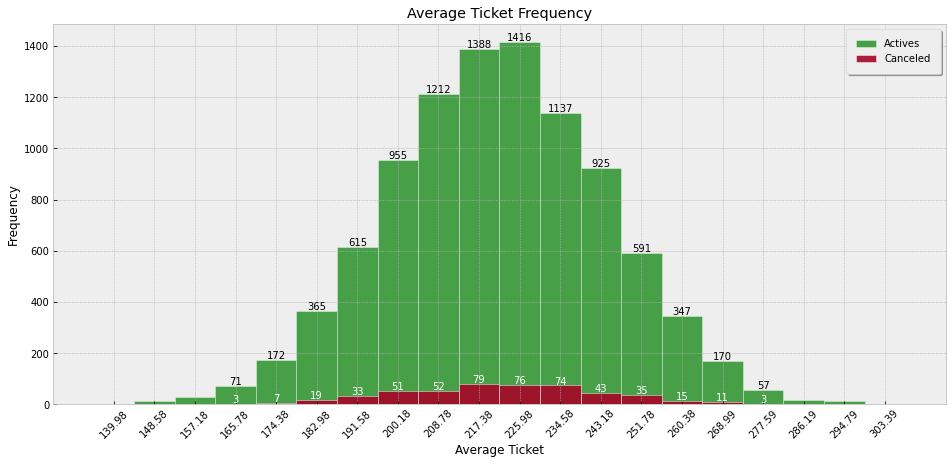

In [24]:
# Criação do Gráfico
ax_active = df_active_subscriptions["average_ticket"].plot.hist(bins=division_active,
                                                                figsize=(16,7),
                                                                rot=45,
                                                                title="Average Ticket Frequency",
                                                                color="green",
                                                                edgecolor='w',
                                                                label="Actives",
                                                                alpha=0.7)
ax_canceled = df_canceled_subscriptions["average_ticket"].plot.hist(bins=division_active,
                                                                    rot=45,
                                                                    color="#a60628",
                                                                    edgecolor='w',
                                                                    label="Canceled",
                                                                    alpha=0.9)

ax_active.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax_active.set_xlabel("Average Ticket")

# Centralizando as coordenadas dos xticks
xticks = [(division_active[idx+1] + value)/2 for idx, value in enumerate(division_active[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value) for value in division_active[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count_active):
    if value > 50:
        plt.text(xticks[idx], value+5, int(value), ha='center')
        plt.text(xticks[idx], count_canceled[idx]+5, int(count_canceled[idx]), ha='center', color="white")


In [25]:
# Salvando a figura localmente
plt.savefig('Average Ticket Frequency.png', format='png')
plt.close()

####  Frequência de Receita Assinaturas
---

In [26]:
# Criação dos valores do histogram, contagem e coordenadas dos grupos, para a plotagem
count_active, division_active = np.histogram(df_active_subscriptions["all_revenue"], bins=20)
count_canceled, _ = np.histogram(df_canceled_subscriptions["all_revenue"], bins=division_active)

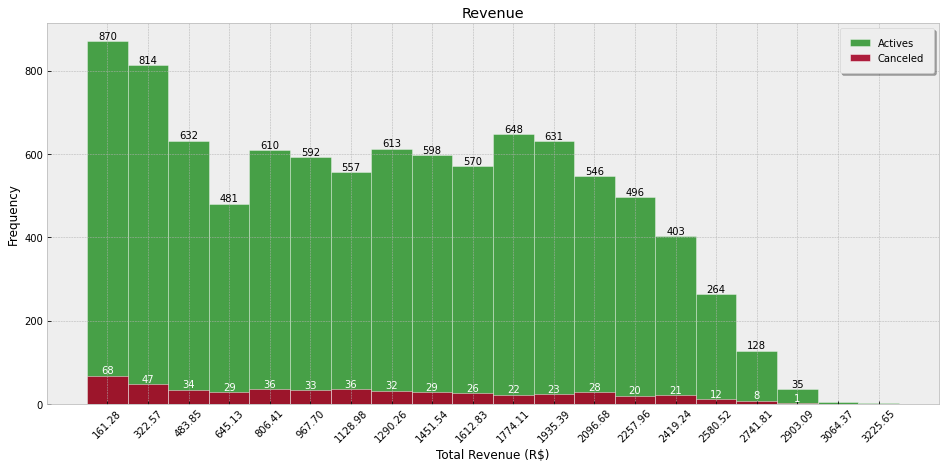

In [27]:
# Criação do Gráfico
ax_active = df_active_subscriptions["all_revenue"].plot.hist(bins=division_active,
                                                                figsize=(16,7),
                                                                rot=45,
                                                                title="Revenue",
                                                                color="green",
                                                                edgecolor='w',
                                                                label="Actives",
                                                                alpha=0.7)
ax_canceled = df_canceled_subscriptions["all_revenue"].plot.hist(bins=division_active,
                                                                    rot=45,
                                                                    stacked=True,
                                                                    color="#a60628",
                                                                    edgecolor='w',
                                                                    label="Canceled",
                                                                    alpha=0.9)

ax_active.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax_active.set_xlabel("Total Revenue (R$)")

# Centralizando as coordenadas dos xticks
xticks = [(division_active[idx+1] + value)/2 for idx, value in enumerate(division_active[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value) for value in division_active[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count_active):
    if value > 30:
        plt.text(xticks[idx], value+5, int(value), ha='center')
        plt.text(xticks[idx], count_canceled[idx]+5, int(count_canceled[idx]), ha='center', color="white")

In [28]:
# Salvando a figura localmente
plt.savefig('Revenue.png', format='png')
plt.close()

####  Versões Canceladas
---

In [29]:
# Realizando a contagem das versões (apenas para o número mais significativo)
version_counter = Counter(df_canceled_subscriptions["version"].apply(lambda version: version[0]))
df_versions = pd.DataFrame.from_dict(version_counter, orient='index')
df_versions.columns = ["Frequency"]

Text(0, 0.5, 'Amount')

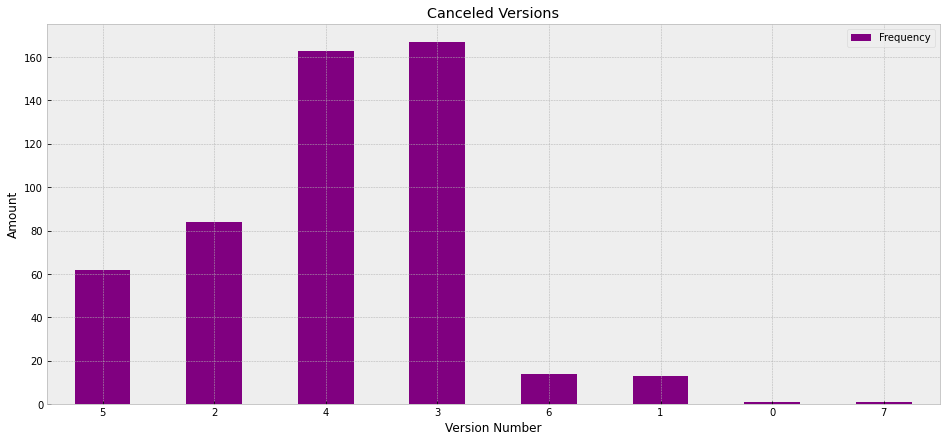

In [30]:
# Criação do Gráfico
ax_versions = df_versions.plot.bar(figsize=(16,7), rot=0, title="Canceled Versions",color="purple")
ax_versions.set_xlabel("Version Number")
ax_versions.set_ylabel("Amount")

In [31]:
# Salvando a figura localmente
plt.savefig('Canceled Versions.png', format='png')
plt.close()

#### Versões Canceladas a partir de Junho/2020
---

In [32]:
# Filtrando linhas para datas a partir de Junho/2020
mask = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) >= pd.to_datetime("2020-05-01 00:00:00.0")
df_canceled_subscriptions_after_may = df_canceled_subscriptions[mask]

In [33]:
# Realizando a contagem das versões (apenas para o número mais significativo)
version_counter = Counter(df_canceled_subscriptions_after_may["version"].apply(lambda version: version[0]))
df_versions = pd.DataFrame.from_dict(version_counter, orient='index')
df_versions.columns = ["Frequency"]

In [34]:
version_counter

Counter({'1': 5, '2': 37, '3': 88, '4': 84, '5': 24, '6': 8})

Text(0, 0.5, 'Amount')

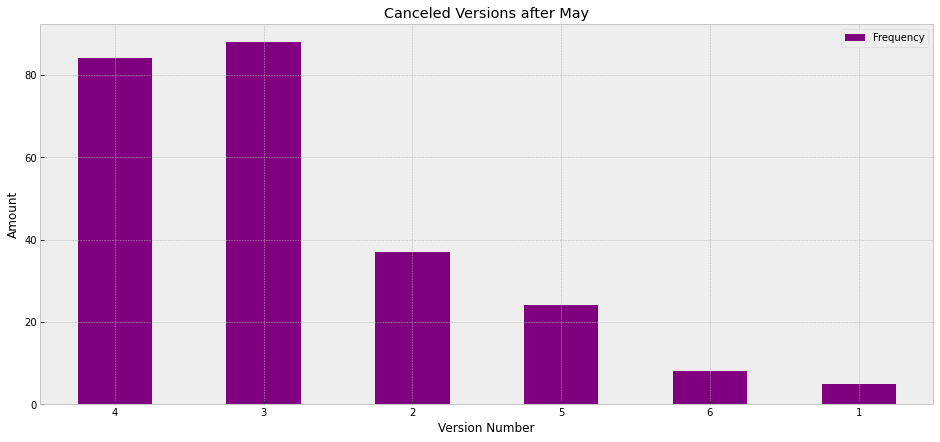

In [35]:
# Criação do Gráfico
ax_versions = df_versions.plot.bar(figsize=(16,7), rot=0, title="Canceled Versions after May",color="purple")
ax_versions.set_xlabel("Version Number")
ax_versions.set_ylabel("Amount")

In [36]:
# Salvando a figura localmente
plt.savefig('Canceled Versions After May.png', format='png')
plt.close()

####  Media de itens por Versão cancelada a partir de Junho/2020
---

In [37]:
mask = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) >= pd.to_datetime("2020-05-01 00:00:00.0")
df_canceled_subscriptions_after_may = df_canceled_subscriptions[mask]

In [38]:
# Realizando a contagem das versões (apenas para o número mais significativo)
df_canceled_subscriptions_after_may.loc[:,"version"] = df_canceled_subscriptions_after_may.version.apply(lambda version: version[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
df_itens_per_ver = df_canceled_subscriptions_after_may[["version","items_quantity"]].groupby(["version"]).mean()

In [40]:
df_itens_per_ver.columns = ["Itens Quantity"]


Text(0.5, 0, 'Version')

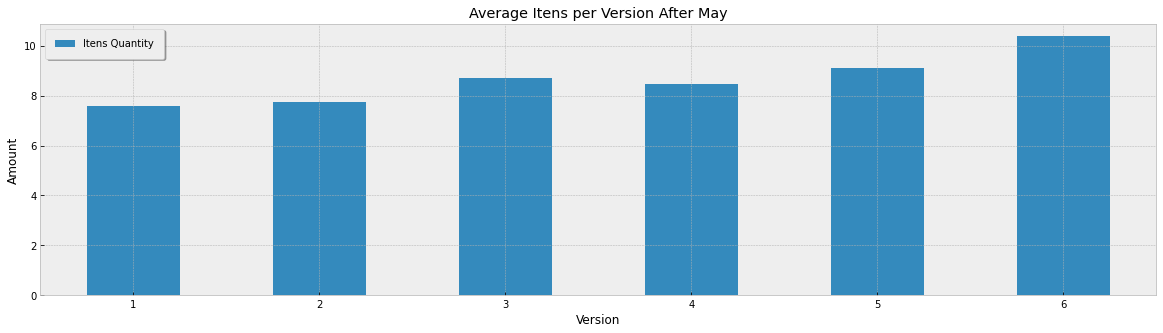

In [41]:
# Criação do Gráfico
ax_itens_per_ver = df_itens_per_ver.plot(kind='bar',figsize=(20,5), rot=0, title="Average Itens per Version After May")
ax_itens_per_ver.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax_itens_per_ver.set_ylabel("Amount")
ax_itens_per_ver.set_xlabel("Version")

In [42]:
# Salvando a figura localmente
plt.savefig('Average Itens per Version After May.png', format='png')
plt.close()

####  Assinaturas Canceladas por Método de Prospecção
---

In [50]:
# Realizando a contagem das assinaturas canceladas por método de prospecção
prospection_counter = Counter(df_canceled_subscriptions["marketing_source"])
df_prospection_counter = pd.DataFrame.from_dict(prospection_counter, orient='index')
df_prospection_counter.columns = ["Frequency"]

Text(0, 0.5, 'Amount')

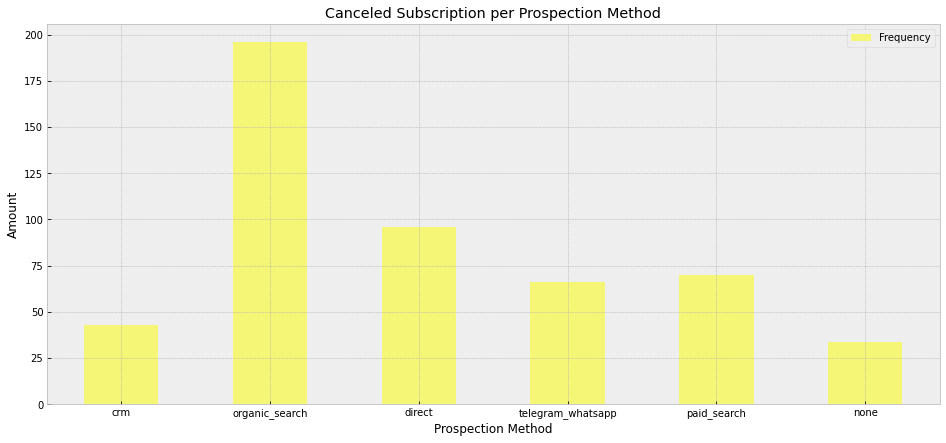

In [52]:
# Criação do Gráfico
ax_prospection = df_prospection_counter.plot.bar(figsize=(16,7), rot=0, title="Canceled Subscription per Prospection Method",color="yellow", alpha=0.5)
ax_prospection.set_xlabel("Prospection Method")
ax_prospection.set_ylabel("Amount")

In [ ]:
# Salvando a figura localmente
plt.savefig('Canceled Subscription per Prospection Method.png', format='png')
plt.close()